In [65]:
import requests
from bs4 import BeautifulSoup

url_basic = 'https://www.tripadvisor.com/'
tripadv = requests.get(url_basic)
s_trip = BeautifulSoup(tripadv.text, 'lxml')
sections = s_trip.find_all('div', attrs={'class':'_2R--RBNa _39kFrNls _2PEEtTWK _3_rLKjCx _3wprI9Ge _1_nbwDp3'})

links_sections = []
for section in sections:
    if section.find('a'):
        links_sections.append('http://www.tripadvisor.com'+section.find('a').get('href'))

#sections[0].find('a').get('href')
#links_sections = [section.find('a').get('href') for section in sections]
links_sections

#¿more is a button what should i do?

['http://www.tripadvisor.com/Hotels',
 'http://www.tripadvisor.com/Rentals',
 'http://www.tripadvisor.com/Attractions',
 'http://www.tripadvisor.com/Restaurants',
 'http://www.tripadvisor.com/UserReview',
 'http://www.tripadvisor.com/ForumHome']

In [74]:
sections_adv = s_trip.find('div', attrs={'class':'_27pk-lCQ'})
print(sections_adv)

None


## SCRAPING TOP DESTINATIONS

In [97]:
url_attractions = 'https://www.tripadvisor.com/Attractions'
attractions = requests.get(url_attractions)
s_attract = BeautifulSoup(attractions.text, 'lxml')
top_destinations = s_attract.find('div', attrs={'data-track-label':'popular_destinations'}).find_all('div', attrs={'class':'poi ui_shelf_item_container ui_geo_shelf_item'})
links_top_attractions = []
for destination in top_destinations:
    if destination.find('a'):
        links_top_attractions.append('http://www.tripadvisor.com'+destination.find('a').get('href'))
        
#links_top_attractions

links_top_attractions



['http://www.tripadvisor.com/Attractions-g31350-Activities-Scottsdale_Arizona.html',
 'http://www.tripadvisor.com/Attractions-g32655-Activities-Los_Angeles_California.html',
 'http://www.tripadvisor.com/Attractions-g45963-Activities-Las_Vegas_Nevada.html',
 'http://www.tripadvisor.com/Attractions-g60745-Activities-Boston_Massachusetts.html']

In [176]:
def content_info(soup):
    #for link in links_top_attractions:
    dir_results = {}
    try:
        
        #Extracting title
        title = soup.find('div', attrs = {'class':'_1l9azAvU'})
        if title is not None:
            dir_results['title'] = title.h1.text
            
        else:
            title = soup.find('div', attrs={'class':'display_center ui_container'})
            if title is not None:
                dir_results['title'] = title.h1.text
            else:
                dir_results['title'] = None
        
        #Extracting Activities
        #fix it for Boston
        activities = soup.find_all('span', attrs = {'class':'_2e_OvRJN'})
                
        if activities is not None:
            activities_list = [activitie.h3.text for activitie in activities]
            dir_results['activities'] = activities_list
        else:  
            print('paila')
            activities = soup.find_all('div', attrs = {'class':'_1lY2qyk3'})
            
            if activities is not None:
                activities_list = [activitie.h3.text for activitie in activities]
                dir_results['activities'] = activities_list
            else:
                dir_results['activities'] = None
                
        #Extracting Images
       
        
        
        print(dir_results)
                                         
          
    except Exception as e:
        print('Error')
        print(e)
        print('\n')
        

 

### TEST MEDIA

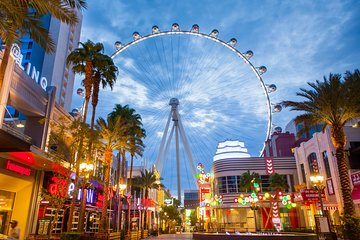

In [198]:
from IPython.display import Image

url_test_vedas = 'https://www.tripadvisor.com/Attractions-g45963-Activities-Las_Vegas_Nevada.html'
request_vegas = requests.get(url_test_vedas)
s_vegas = BeautifulSoup(request_vegas.text, 'lxml')
media_vegas = s_vegas.find('a', attrs={'class':'_1zqXepI-'}).find('img').get('data-url')
image_req = requests.get(media_vegas)

image_req.status_code
Image(image_req.content)
#media_content = s_content.find_all('a', attrs={'class':'_1zqXepI-'})


In [173]:
content_test = requests.get('https://www.tripadvisor.com/Attractions-g60745-Activities-Boston_Massachusetts.html')
if content.status_code == 200:
    s_content_test = BeautifulSoup(content_test.text,'lxml')
    activities_test = s_content_test.find_all('div', attrs = {'class':'_1lY2qyk3'})
    activities_list = [activitie.h3.text for activitie in activities_test]
    print(activities_list)

['Boston Old Town Hop On Hop Off Trolley Tour', 'Boston Tea Party Ships & Museum Admission', 'Boston Classic: Duck Boat Sightseeing Tour', 'Boston Ghosts & Gravestones Night-Time Trolley Tour', "Martha's Vineyard Day Trip from Boston with Optional Island Tour (Small Group)", 'Walking Tour of Freedom Trail History (Small Group)', 'New England Aquarium Admission in Boston', 'Go Boston All-Inclusive Pass', 'Boston Odyssey Dinner Cruise', 'Sightseeing Day Sail around Boston Harbor', 'Sunset Cruise', 'Boston Odyssey Dinner Cruise', 'Secret Boston Vip Tour', "Boston's North End Small-Group Walking Food Tour", "Fresh Pasta Making Lesson in Boston's North End (Homemade Pasta in Little Italy)", 'Classic Bites of Boston Food Tour', 'Day Trip to Boston & Woodbury Common Premium Outlets.', 'Boston Instagram Tour: Most Famous Spots (Private & All-Inclusive)', 'Boston Walk Through History Private Tour All-Inclusive', 'Boston to Plymouth Small Group Day-Trip with Plimoth Plantation & Mayflower II', '

### CALL CONTENT_INFO

In [177]:
for link in links_top_attractions:
    content = requests.get(link)
    if content.status_code == 200:
        s_content = BeautifulSoup(content.text,'lxml')
        content_info(s_content)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
{'title': 'Things to Do in Scottsdale', 'activities': ['Sonoran Desert Jeep Tour at Sunset', 'Medieval Times Dinner & Tournament Admission Ticket in Scottsdale', '2-Hour Scottsdale Segway Tours - 10am Departure', 'Half Day Sonoran Desert Mountain Biking Tour', 'Phoenix Indoor Skydiving Experience with 2 Flights & Personalized Certificate', '1-Hour Private Chemical Lab Escape Room Experience', 'Grand Canyon and Sedona Day Adventure from Scottsdale or Phoenix', '1.5 Hour Scottsdale Segway Tour', '2-Hour Arizona Desert Guided E-Bike Tour', '2-Person Guided U-Drive ATV Sand Buggy Tour', 'Sonoran Desert 2 Hour Guided ATV Adventure', 'Sonoran Desert Jeep Tour - Morning or Afternoon', 'Party Bike Pub Crawl of Old Town Scottsdale', 'Horse Country Estate and Vineyard Wine Tasting Tour', 'Arizona Food Tours- A Taste of Old Town Scottsdale ', 'H2 Hummer VIP Sunset Wine and Chee

# SCRAPY

In [7]:
try:
    import scrapy
except:
    !pip3 install scrapy
    import scrapy

In [12]:
class Spidertrip(scrapy.Spider):
    name = 'spidertrip'
    allowed_domains = ['tripadvisor.com']
    custom_settings = {'FEED_FORMAT': 'json', 
                      'FEED_URI':'results.json'}
    #start_urls = 